# Clustering de optimización

## Preparación de ambiente

### Carga de módulos

In [7]:
# Data Wrangling
import pandas as pd

# Data Visualization
import cufflinks as cf

# Data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

# Environment setup
cf.go_offline()

## Datos

### Carga de datos

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving movies_tad.pickle to movies_tad.pickle


In [11]:
df = pd.read_pickle("movies_tad.pickle")

ValueError: ignored

In [ ]:
df

,movieId,title,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,Sabrina (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,183611,Game Night (2018),1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1550,184471,Tomb Raider (2018),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,187593,Deadpool 2 (2018),1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,187595,Solo: A Star Wars Story (2018),1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['movieId', 'title', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_children', 'genre_comedy', 'genre_crime',
       'genre_documentary', 'genre_drama',
       ...
       'tag_thought', 'tag_time', 'tag_top', 'tag_travel', 'tag_twist',
       'tag_vietnam', 'tag_violence', 'tag_visually', 'tag_war', 'tag_world'],
      dtype='object', length=127)

In [ ]:
X = df.set_index(["movieId", "title"])

In [ ]:
X

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Sabrina (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,Game Night (2018),1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184471,Tomb Raider (2018),1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
187593,Deadpool 2 (2018),1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelado

### Escalamiento

In [ ]:
sc = MinMaxScaler()

In [ ]:
sc.fit_transform(X)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [ ]:
Xs.describe()

,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,...,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,0.151223,0.138996,0.054698,0.059846,0.332046,0.131274,0.042471,0.561133,0.076577,0.021236,...,0.005363,0.004076,0.007722,0.004505,0.005148,0.006435,0.001563,0.005792,0.015444,0.009653
std,0.358381,0.346054,0.227462,0.237277,0.471099,0.337809,0.201726,0.496408,0.266004,0.144215,...,0.051171,0.045368,0.087563,0.048381,0.054575,0.079986,0.028269,0.055163,0.123350,0.097803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Reducción de dimensiones

In [ ]:
pca = PCA(n_components=3)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), index = Xs.index, columns=["d1", "d2", "d3"])

In [ ]:
Xp

,,d1,d2,d3
movieId,title,,,
1,Toy Story (1995),1.262723,0.070362,0.306116
2,Jumanji (1995),0.648148,0.500719,0.308702
3,Grumpier Old Men (1995),0.887596,-0.651383,-0.288787
5,Father of the Bride Part II (1995),0.791294,-0.236195,-0.037863
7,Sabrina (1995),0.879269,-0.661079,-0.276416
...,...,...,...,...
183611,Game Night (2018),0.702813,0.278576,0.043921
184471,Tomb Raider (2018),0.682385,0.871056,0.336819
187593,Deadpool 2 (2018),0.997864,0.385060,0.108357


### Visualización

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.13630039, 0.25444123, 0.33947235])

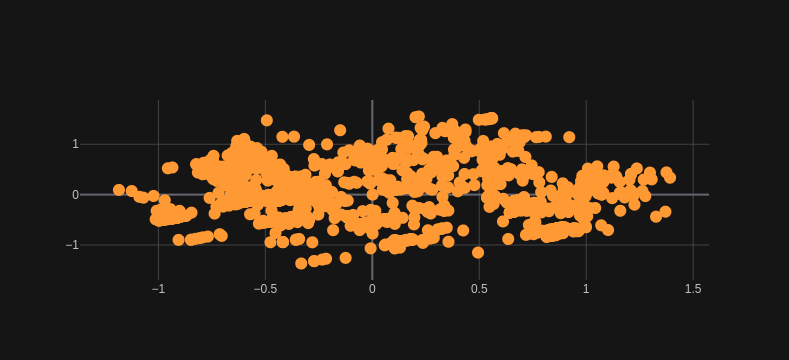

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", mode="markers", text="title")

In [ ]:
Xp

,,d1,d2,d3
movieId,title,,,
1,Toy Story (1995),1.262723,0.070362,0.306116
2,Jumanji (1995),0.648148,0.500719,0.308702
3,Grumpier Old Men (1995),0.887596,-0.651383,-0.288787
5,Father of the Bride Part II (1995),0.791294,-0.236195,-0.037863
7,Sabrina (1995),0.879269,-0.661079,-0.276416
...,...,...,...,...
183611,Game Night (2018),0.702813,0.278576,0.043921
184471,Tomb Raider (2018),0.682385,0.871056,0.336819
187593,Deadpool 2 (2018),0.997864,0.385060,0.108357


### Selección de número óptimo de clusters

#### Generación de clusters

In [ ]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

In [ ]:
df_cl = pd.DataFrame()
for k in range(2, 15):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(Xp)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    df_cl.loc[k, "sse"] =  kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    df_cl.loc[k, "db"] = davies_bouldin_score(Xp,clusters)
    df_cl.loc[k, "slc"] = silhouette_score(Xp,clusters)

#### Método del codo  (Inercia)

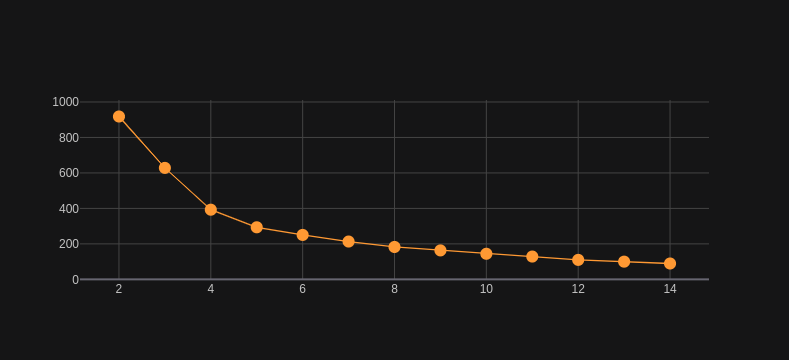

In [ ]:
df_cl[["sse"]].iplot(mode="lines+markers")

#### Davies-Bouldin

In [ ]:
df_cl

,sse,db,slc
2,918.141816,1.242051,0.361461
3,628.444750,0.943823,0.425490
4,392.760678,0.779491,0.468510
5,293.557234,0.724453,0.476895
6,250.469343,0.815476,0.470233
7,213.285580,0.762671,0.472027
8,182.604503,0.747422,0.477563
9,163.235356,0.816532,0.464333
10,144.302963,0.795046,0.485858
11,128.574345,0.778218,0.499072


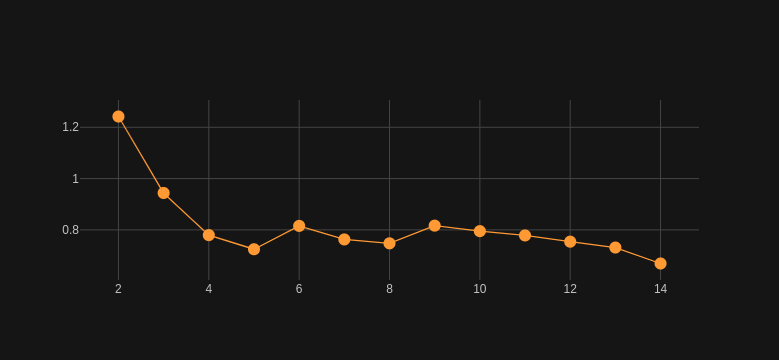

In [ ]:
df_cl[["db"]].iplot(mode="markers+lines")

#### Silhouette

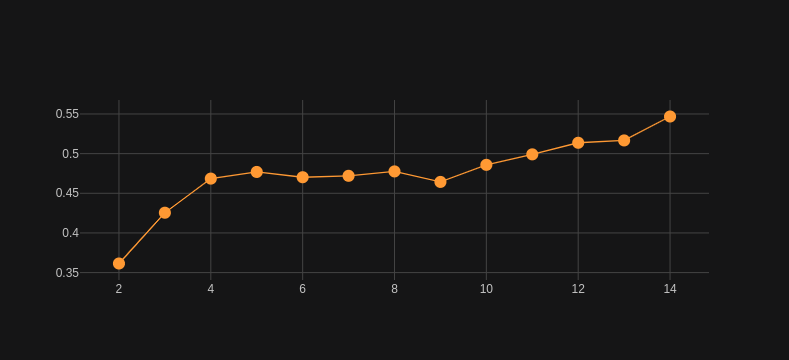

In [ ]:
df_cl[["slc"]].iplot(mode="markers+lines")

### K-Means

#### Entrenamiento de modelo

In [ ]:
cluster = KMeans(n_clusters=5, random_state=10)

In [ ]:
X["cl"] = Xs["cl"] = Xp["cl"] = [str(x) for x in cluster.fit_predict(Xp)]

#### Visualización

/home/oscar/VirtualEnvs/md/lib/python3.10/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/home/oscar/VirtualEnvs/md/lib/python3.10/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



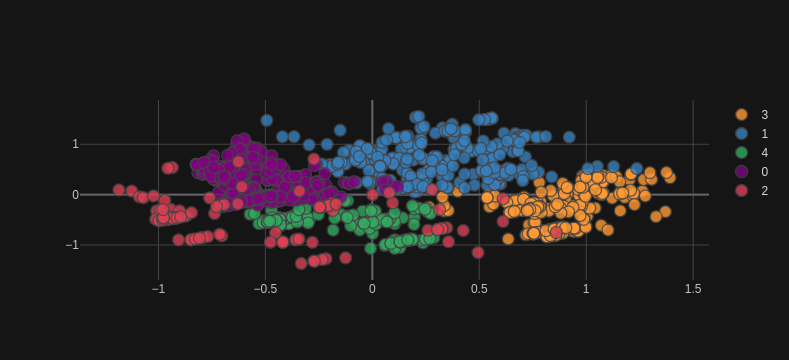

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl", mode="markers", text="title")

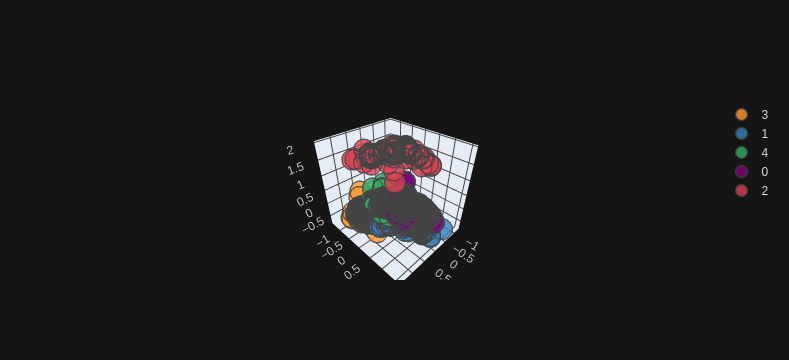

In [ ]:
Xp.reset_index().iplot(kind="scatter3d", x="d1", y="d2", z="d3", categories="cl", mode="markers", text="title")

#### Perfilamiento

In [ ]:
X.groupby("cl").mean()

,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
cl,,,,,,,,,,,,,,,,,,,,,
0,0.092157,0.050980,0.021569,0.035294,0.009804,0.190196,0.001961,0.990196,0.029412,0.027451,...,0.037255,0.007843,0.009804,0.007843,0.033333,0.011765,0.025490,0.011765,0.037255,0.019608
1,0.433140,0.354651,0.101744,0.078488,0.037791,0.156977,0.136628,0.084302,0.125000,0.037791,...,0.017442,0.029070,0.014535,0.034884,0.020349,0.002907,0.008721,0.046512,0.002907,0.011628
2,0.050000,0.091667,0.041667,0.016667,0.250000,0.100000,0.133333,0.708333,0.050000,0.025000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008333,0.000000,0.000000,0.000000,0.008333
3,0.102167,0.170279,0.099071,0.130031,0.978328,0.086687,0.003096,0.003096,0.126935,0.000000,...,0.000000,0.015480,0.006192,0.015480,0.000000,0.000000,0.003096,0.006192,0.003096,0.000000
4,0.000000,0.007782,0.007782,0.015564,0.591440,0.050584,0.003891,0.980545,0.054475,0.011673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007782,0.000000,0.011673,0.011673,0.000000


In [ ]:
X.groupby("cl").mean().style.background_gradient(cmap='Blues')

,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,genre_genres,genre_horror,genre_imax,genre_listed,genre_musical,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max,tag_250,tag_action,tag_adolescence,tag_adultery,tag_adventure,tag_aliens,tag_and,tag_animation,tag_anime,tag_appealing,tag_atmospheric,tag_bad,tag_based,tag_beautiful,tag_best,tag_bittersweet,tag_black,tag_book,tag_boxing,tag_brothers,tag_business,tag_christmas,tag_cinematography,tag_classic,tag_comedy,tag_comic,tag_court,tag_crime,tag_dark,tag_death,tag_dialogue,tag_disney,tag_disturbing,tag_dreamlike,tag_emotional,tag_ending,tag_england,tag_family,tag_fi,tag_funny,tag_ghosts,tag_good,tag_great,tag_heist,tag_high,tag_holocaust,tag_humor,tag_illness,tag_imdb,tag_in,tag_india,tag_journalism,tag_killer,tag_king,tag_leonardo,tag_mafia,tag_men,tag_mental,tag_mindfuck,tag_movie,tag_music,tag_netflix,tag_new,tag_of,tag_on,tag_oscar,tag_philosophical,tag_plot,tag_politics,tag_provoking,tag_psychological,tag_psychology,tag_queue,tag_quirky,tag_religion,tag_remake,tag_robots,tag_romance,tag_satire,tag_school,tag_sci,tag_shakespeare,tag_soundtrack,tag_space,tag_stephen,tag_story,tag_superhero,tag_surreal,tag_suspense,tag_the,tag_thought,tag_time,tag_top,tag_travel,tag_twist,tag_vietnam,tag_violence,tag_visually,tag_war,tag_world
cl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.092157,0.050980,0.021569,0.035294,0.009804,0.190196,0.001961,0.990196,0.029412,0.027451,0.000000,0.045098,0.009804,0.000000,0.021569,0.119608,0.000000,0.041176,0.045098,0.284314,0.100000,0.015686,3.758009,2.256863,4.612745,0.009804,0.009804,0.009804,0.003922,0.003922,0.005882,0.009804,0.001961,0.001961,0.009804,0.052941,0.011765,0.015686,0.007843,0.007843,0.007843,0.015686,0.005882,0.019608,0.007843,0.015686,0.001961,0.011765,0.011765,0.025490,0.000000,0.015686,0.031373,0.037255,0.017647,0.015686,0.005882,0.019608,0.009804,0.015686,0.031373,0.005882,0.003922,0.003922,0.009804,0.005882,0.023529,0.019608,0.003922,0.005882,0.013725,0.009804,0.017647,0.009804,0.003922,0.013725,0.007843,0.011765,0.011765,0.013725,0.021569,0.009804,0.017647,0.011765,0.017647,0.015686,0.001961,0.003922,0.003922,0.015686,0.007843,0.009804,0.005882,0.017647,0.037255,0.019608,0.019608,0.000000,0.011765,0.025490,0.000000,0.000000,0.003922,0.005882,0.005882,0.003922,0.013725,0.015686,0.007843,0.013725,0.017647,0.003922,0.017647,0.023529,0.000000,0.037255,0.007843,0.009804,0.007843,0.033333,0.011765,0.025490,0.011765,0.037255,0.019608
1,0.433140,0.354651,0.101744,0.078488,0.037791,0.156977,0.136628,0.084302,0.125000,0.037791,0.002907,0.162791,0.061047,0.002907,0.040698,0.139535,0.002907,0.037791,0.308140,0.366279,0.020349,0.023256,3.552209,1.672965,4.607558,0.014535,0.046512,0.000000,0.000000,0.023256,0.029070,0.017442,0.014535,0.026163,0.031977,0.031977,0.049419,0.008721,0.020349,0.008721,0.002907,0.011628,0.034884,0.000000,0.005814,0.014535,0.002907,0.020349,0.023256,0.011628,0.031977,0.002907,0.017442,0.031977,0.000000,0.011628,0.029070,0.011628,0.020349,0.005814,0.037791,0.002907,0.000000,0.072674,0.008721,0.011628,0.008721,0.026163,0.023256,0.002907,0.008721,0.008721,0.002907,0.014535,0.014535,0.002907,0.002907,0.011628,0.026163,0.005814,0.000000,0.002907,0.005814,0.023256,0.011628,0.026163,0.000000,0.008721,0.029070,0.017442,0.008721,0.014535,0.040698,0.020349,0.017442,0.008721,0.020349,0.000000,0.005814,0.005814,0.017442,0.026163,0.002907,0.002907,0.000000,0.072674,0.000000,0.023256,0.075581,0.020349,0.017442,0.061047,0.023256,0.026163,0.023256,0.017442,0.029070,0.014535,0.034884,0.020349,0.002907,0.008721,0.046512,0.002907,0.011628
2,0.050000,0.091667,0.041667,0.016667,0.250000,0.100000,0.133333,0.708333,0.050000,0.025000,0.000000,0.025000,0.008333,0.000000,0.041667,0.058333,0.00

In [ ]:
import matplotlib

,cl
0,0.328185
1,0.221364
3,0.207851
4,0.165380
2,0.077220


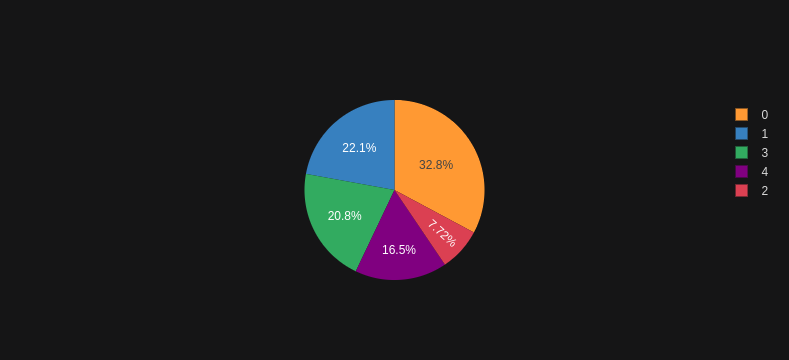

In [ ]:
X["cl"].value_counts(normalize=True).reset_index().iplot(kind="pie", labels="index", values="cl")

In [ ]:
0) Frutazos
1) Acción
2) Las chidas
3) Chamacos
4) Drama